# Pengertian Linear Regression / Regresi Linear

Dalam statistika, regresi linear adalah sebuah pendekatan untuk memodelkan hubungan antara variable terikat Y dan satu atau lebih variable bebas yang disebut X. Salah satu kegunaan dari regresi linear adalah untuk melakukan prediksi berdasarkan data-data yang telah dimiliki sebelumnya. Hubungan di antara variable-variabel tersebut disebut sebagai model regresi linear. Berdasarkan penggunaan variable bebas, maka regresi linear dapat dibagi menjadi dua, yaitu regresi linear univariate dan regresi linear multivariate. Regresi linier adalah salah satu dari jenis analisis peramalan atau prediksi yang sering digunakan pada data berskala kuantitatif (interval atau rasio).

In [ ]:
yfrom google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [ ]:
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [ ]:
!kaggle datasets download -d shree1992/housedata

  0% 0.00/432k [00:00<?, ?B/s]
100% 432k/432k [00:00<00:00, 29.8MB/s]


In [ ]:
!unzip \*.zip && rm *.zip

Archive:  housedata.zip
replace data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: data.csv                
replace data.dat? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: data.dat                
replace output.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace output.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: output.csv              


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
rumah = pd.read_csv('data.csv')

In [ ]:
rumah.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [ ]:
rumah.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [ ]:
rumah.drop('date', axis=1, inplace=True)
rumah.drop('street', axis=1, inplace=True)
rumah.drop('city', axis=1, inplace=True)
rumah.drop('statezip', axis=1, inplace=True)
rumah.drop('country', axis=1, inplace=True)

In [ ]:
rumah.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992


In [ ]:
rumah.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   float64
 1   bedrooms       4600 non-null   float64
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   sqft_lot       4600 non-null   int64  
 5   floors         4600 non-null   float64
 6   waterfront     4600 non-null   int64  
 7   view           4600 non-null   int64  
 8   condition      4600 non-null   int64  
 9   sqft_above     4600 non-null   int64  
 10  sqft_basement  4600 non-null   int64  
 11  yr_built       4600 non-null   int64  
 12  yr_renovated   4600 non-null   int64  
dtypes: float64(4), int64(9)
memory usage: 467.3 KB


In [ ]:
rumah.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [ ]:
rumah.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
dtype: int64

In [ ]:
rumah[rumah==0].count()

price              49
bedrooms            2
bathrooms           2
sqft_living         0
sqft_lot            0
floors              0
waterfront       4567
view             4140
condition           0
sqft_above          0
sqft_basement    2745
yr_built            0
yr_renovated     2735
dtype: int64

In [ ]:
rumah.drop(rumah[rumah['price'] == 0].index, inplace = True)
rumah.drop(rumah[rumah['bathrooms'] == 0].index, inplace = True)
rumah.drop(rumah[rumah['bedrooms'] == 0].index, inplace = True)

In [ ]:
rumah.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4549 entries, 0 to 4599
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4549 non-null   float64
 1   bedrooms       4549 non-null   float64
 2   bathrooms      4549 non-null   float64
 3   sqft_living    4549 non-null   int64  
 4   sqft_lot       4549 non-null   int64  
 5   floors         4549 non-null   float64
 6   waterfront     4549 non-null   int64  
 7   view           4549 non-null   int64  
 8   condition      4549 non-null   int64  
 9   sqft_above     4549 non-null   int64  
 10  sqft_basement  4549 non-null   int64  
 11  yr_built       4549 non-null   int64  
 12  yr_renovated   4549 non-null   int64  
dtypes: float64(4), int64(9)
memory usage: 657.5 KB


[Text(0, 0.5, 'Jumlah Rumah'), Text(0.5, 0, 'Jumlah Kamar Mandi')]

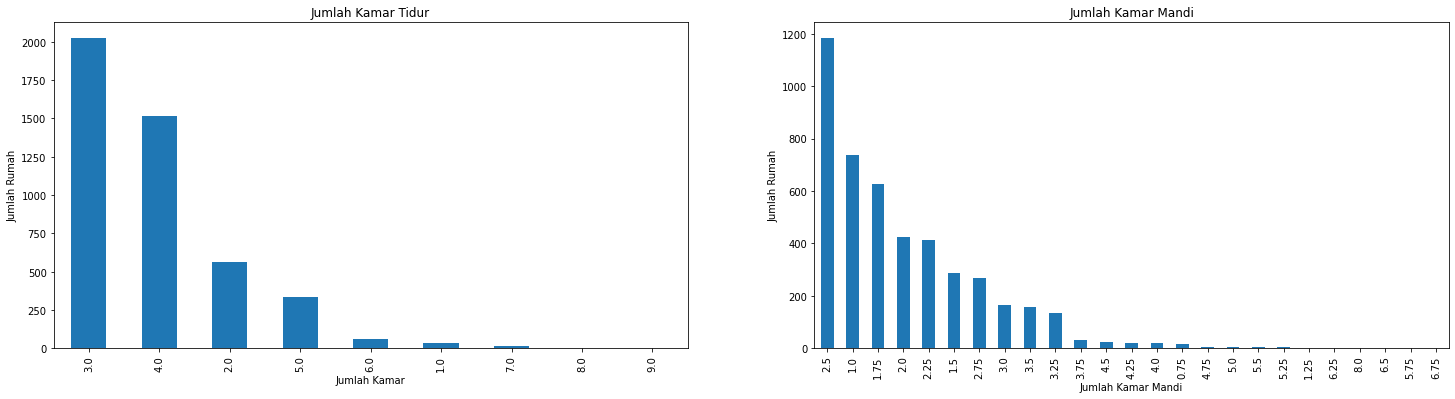

In [29]:
plt.figure(figsize=(25,6))

plt.subplot(1,2,1)
plt1 = rumah.bedrooms.value_counts().plot(kind='bar')
plt.title('Jumlah Kamar Tidur')
plt1.set(xlabel='Jumlah Kamar', ylabel='Jumlah Rumah')

plt.subplot(1,2,2)
plt2 = rumah.bathrooms.value_counts().plot(kind='bar')
plt.title('Jumlah Kamar Mandi')
plt2.set(xlabel='Jumlah Kamar Mandi', ylabel='Jumlah Rumah')

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
rumah.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated'],
      dtype='object')

In [ ]:
X = rumah[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated']]
y = rumah['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

In [ ]:
linreg = LinearRegression()

In [ ]:
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
pred = linreg.predict(X_test)

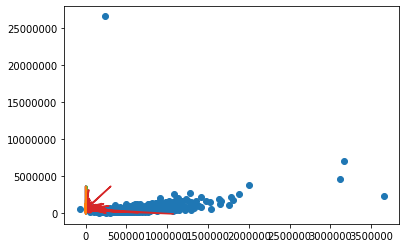

In [ ]:
plt.ticklabel_format(useOffset=False, style='plain', axis='both')
plt.scatter(pred, y_test)
plt.plot(X_test, pred)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_test, pred)

0.11987337330043213